In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np

np.random.seed(42)

pio.renderers.default = "notebook"

# Initialize Spark Session
spark = SparkSession.builder.appName("LightcastData").getOrCreate()

# Load Data
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("./data/lightcast_job_postings.csv")

# Show Schema and Sample Data
print("---This is Diagnostic check, No need to print it in the final doc---")

df.printSchema() # comment this line when rendering the submission
df.show(5)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/20 17:53:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


---This is Diagnostic check, No need to print it in the final doc---
root
 |-- ID: string (nullable = true)
 |-- LAST_UPDATED_DATE: string (nullable = true)
 |-- LAST_UPDATED_TIMESTAMP: timestamp (nullable = true)
 |-- DUPLICATES: integer (nullable = true)
 |-- POSTED: string (nullable = true)
 |-- EXPIRED: string (nullable = true)
 |-- DURATION: integer (nullable = true)
 |-- SOURCE_TYPES: string (nullable = true)
 |-- SOURCES: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- ACTIVE_URLS: string (nullable = true)
 |-- ACTIVE_SOURCES_INFO: string (nullable = true)
 |-- TITLE_RAW: string (nullable = true)
 |-- BODY: string (nullable = true)
 |-- MODELED_EXPIRED: string (nullable = true)
 |-- MODELED_DURATION: integer (nullable = true)
 |-- COMPANY: integer (nullable = true)
 |-- COMPANY_NAME: string (nullable = true)
 |-- COMPANY_RAW: string (nullable = true)
 |-- COMPANY_IS_STAFFING: boolean (nullable = true)
 |-- EDUCATION_LEVELS: string (nullable = true)
 |-- EDUCATIO

25/06/20 17:54:22 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+-----------------+----------------------+----------+--------+---------+--------+--------------------+--------------------+--------------------+-----------+-------------------+--------------------+--------------------+---------------+----------------+--------+--------------------+-----------+-------------------+----------------+---------------------+-------------+-------------------+-------------+------------------+---------------+--------------------+--------------------+--------------------+-------------+------+-----------+----------------+-------------------+---------+-----------+--------------------+--------------------+-------------+------+--------------+-----+--------------------+-----+----------+---------------+--------------------+---------------+--------------------+------------+--------------------+------------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+------

In [2]:
columns_to_drop = [
    "ID", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS2", "NAICS3", "NAICS4", "NAICS5", "NAICS6",
    "SOC_2", "SOC_3"
]
df = df.drop(*columns_to_drop)
df.show(5)

+-----------------+--------+---------+--------+--------------------+--------------------+-------------------+--------------------+--------------------+---------------+----------------+--------+--------------------+-----------+-------------------+----------------+---------------------+-------------+-------------------+-------------+------------------+---------------+--------------------+--------------------+--------------------+-------------+------+-----------+----------------+-------------------+---------+-----------+--------------------+--------------------+-------------+------+--------------+-----+--------------------+-----+----------+---------------+--------------------+---------------+--------------------+------------+--------------------+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+--------------------+--------------------+--------------------+------

In [3]:
selected_columns = [

#job name and type of employment
    "TITLE_RAW", "TITLE_NAME", "TITLE_CLEAN", "EMPLOYMENT_TYPE_NAME", "REMOTE_TYPE_NAME",

#skills and education
    "COMMON_SKILLS_NAME", "SPECIALIZED_SKILLS_NAME", "SOFTWARE_SKILLS_NAME",
    
    "MIN_EDULEVELS_NAME", "MAX_EDULEVELS_NAME", "EDUCATION_LEVELS_NAME",
    
#experience and location
    "MIN_YEARS_EXPERIENCE", "MAX_YEARS_EXPERIENCE",

    "LOCATION", "STATE", "STATE_NAME", "CITY_NAME", "COUNTY_NAME",

#Salary and pay period
    "SALARY", "SALARY_FROM", "SALARY_TO",

#Industry and company information

    "LOT_V6_OCCUPATION_NAME", "LOT_V6_OCCUPATION_GROUP_NAME", "LOT_V6_SPECIALIZED_OCCUPATION_NAME",
    "COMPANY_RAW",

]


df_selected = df.select(*selected_columns)

df_selected.pd = df_selected.toPandas()


In [4]:
df_selected.pd.isnull().sum()

TITLE_RAW                               104
TITLE_NAME                               44
TITLE_CLEAN                             140
EMPLOYMENT_TYPE_NAME                     44
REMOTE_TYPE_NAME                         44
COMMON_SKILLS_NAME                       44
SPECIALIZED_SKILLS_NAME                  44
SOFTWARE_SKILLS_NAME                     44
MIN_EDULEVELS_NAME                       44
MAX_EDULEVELS_NAME                    56183
EDUCATION_LEVELS_NAME                    44
MIN_YEARS_EXPERIENCE                  23146
MAX_YEARS_EXPERIENCE                  64068
LOCATION                                 44
STATE                                    44
STATE_NAME                               44
CITY_NAME                                44
COUNTY_NAME                              44
SALARY                                41690
SALARY_FROM                           40100
SALARY_TO                             40100
LOT_V6_OCCUPATION_NAME                   44
LOT_V6_OCCUPATION_GROUP_NAME    

In [5]:
df_selected.pd.shape

(72498, 25)

In [6]:
df_selected.pd['LOT_V6_SPECIALIZED_OCCUPATION_NAME'].unique()


array(['General ERP Analyst / Consultant', 'Oracle Consultant / Analyst',
       'Data Analyst', 'Enterprise Architect',
       'Business Analyst (General)', 'SAP Analyst / Admin',
       'Business Intelligence Analyst', 'Financial Data Analyst',
       'Data Quality Analyst', 'Healthcare Analyst', None,
       'Marketing Analyst'], dtype=object)

In [7]:
df_salary = df_selected.pd[df_selected.pd['SALARY'] > 0].copy()

In [8]:
df_salary.isnull().sum()

TITLE_RAW                                26
TITLE_NAME                                0
TITLE_CLEAN                              56
EMPLOYMENT_TYPE_NAME                      0
REMOTE_TYPE_NAME                          0
COMMON_SKILLS_NAME                        0
SPECIALIZED_SKILLS_NAME                   0
SOFTWARE_SKILLS_NAME                      0
MIN_EDULEVELS_NAME                        0
MAX_EDULEVELS_NAME                    22098
EDUCATION_LEVELS_NAME                     0
MIN_YEARS_EXPERIENCE                   7111
MAX_YEARS_EXPERIENCE                  27052
LOCATION                                  0
STATE                                     0
STATE_NAME                                0
CITY_NAME                                 0
COUNTY_NAME                               0
SALARY                                    0
SALARY_FROM                               0
SALARY_TO                                 0
LOT_V6_OCCUPATION_NAME                    0
LOT_V6_OCCUPATION_GROUP_NAME    

In [9]:
df_salary.shape

(30808, 25)

In [10]:
df_selected.pd['LOT_V6_SPECIALIZED_OCCUPATION_NAME'].value_counts()

LOT_V6_SPECIALIZED_OCCUPATION_NAME
Data Analyst                        27832
General ERP Analyst / Consultant     9931
Enterprise Architect                 8212
Oracle Consultant / Analyst          8141
SAP Analyst / Admin                  7734
Business Analyst (General)           4326
Business Intelligence Analyst        3639
Financial Data Analyst               1155
Data Quality Analyst                 1070
Healthcare Analyst                    261
Marketing Analyst                     153
Name: count, dtype: int64

# PLOT 1  Select (LOT_NAME_SPECIFIC) Mean Salary & Job Demand 

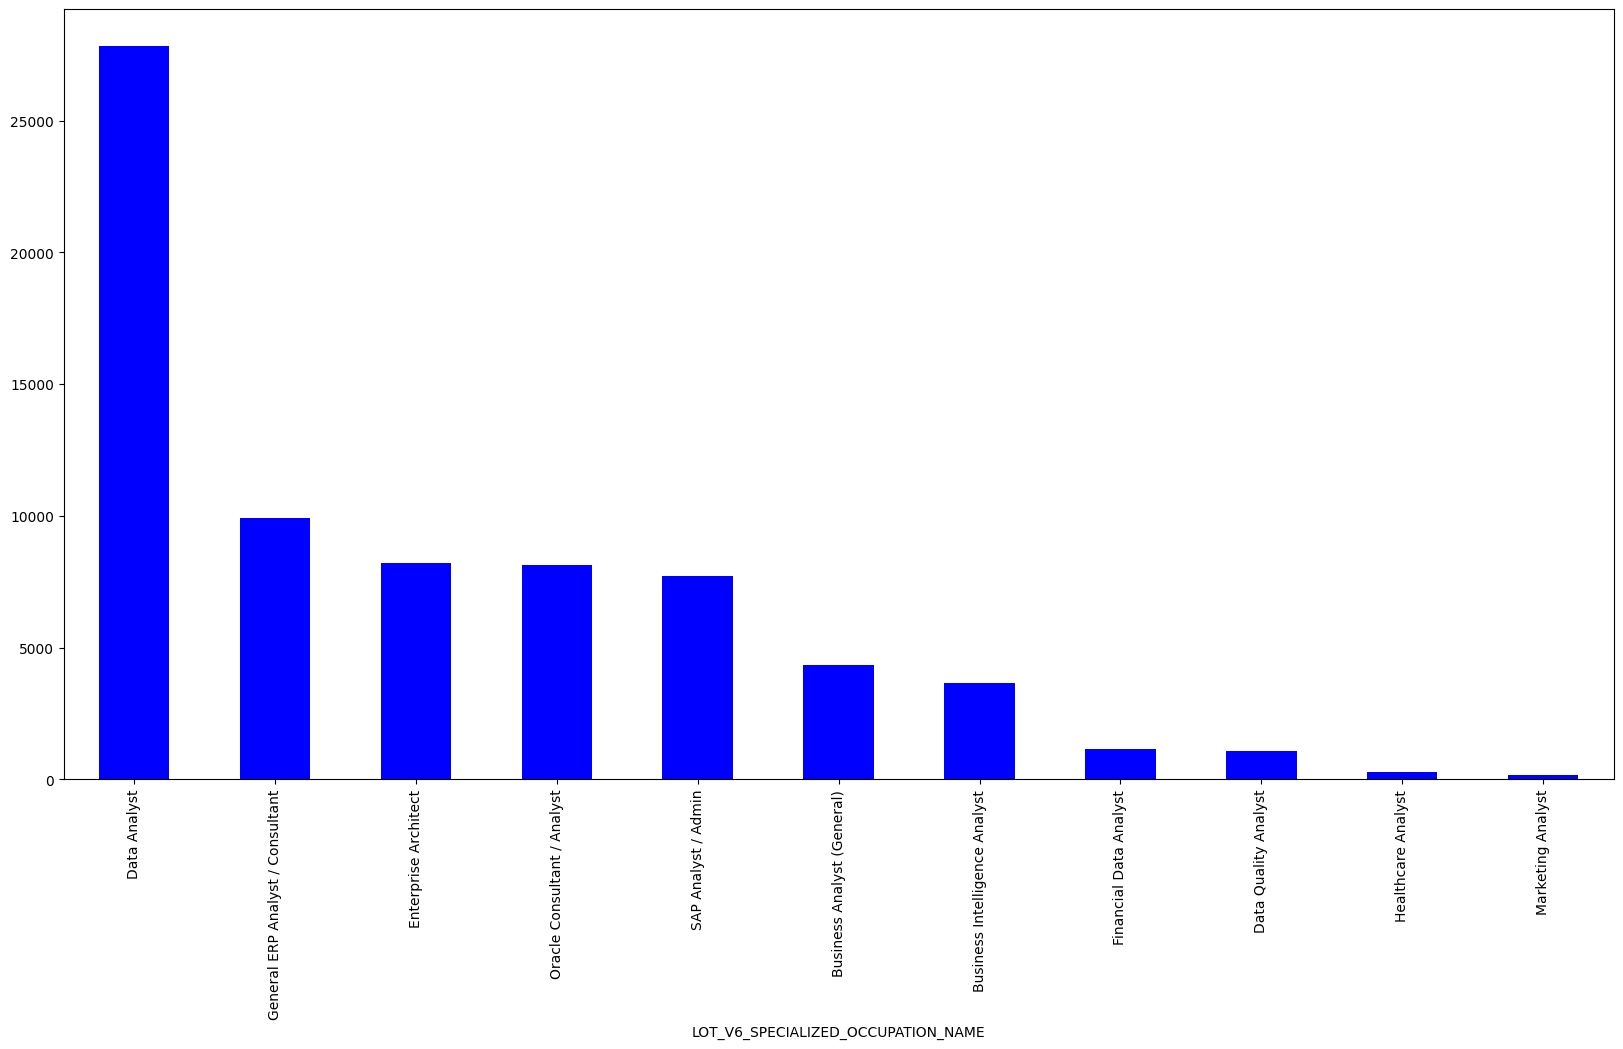

In [11]:
df_job = df_selected.pd['LOT_V6_SPECIALIZED_OCCUPATION_NAME'].value_counts().plot(kind='bar', figsize=(20,10),color = 'blue')


In [12]:
df_selected.pd.groupby("LOT_V6_SPECIALIZED_OCCUPATION_NAME")["SALARY"].mean()

LOT_V6_SPECIALIZED_OCCUPATION_NAME
Business Analyst (General)          100888.607317
Business Intelligence Analyst       108886.397778
Data Analyst                        103796.067383
Data Quality Analyst                 99441.350000
Enterprise Architect                162408.228546
Financial Data Analyst               64161.114219
General ERP Analyst / Consultant    129766.138806
Healthcare Analyst                   93609.968085
Marketing Analyst                    97650.153846
Oracle Consultant / Analyst         138141.414918
SAP Analyst / Admin                 115745.803736
Name: SALARY, dtype: float64

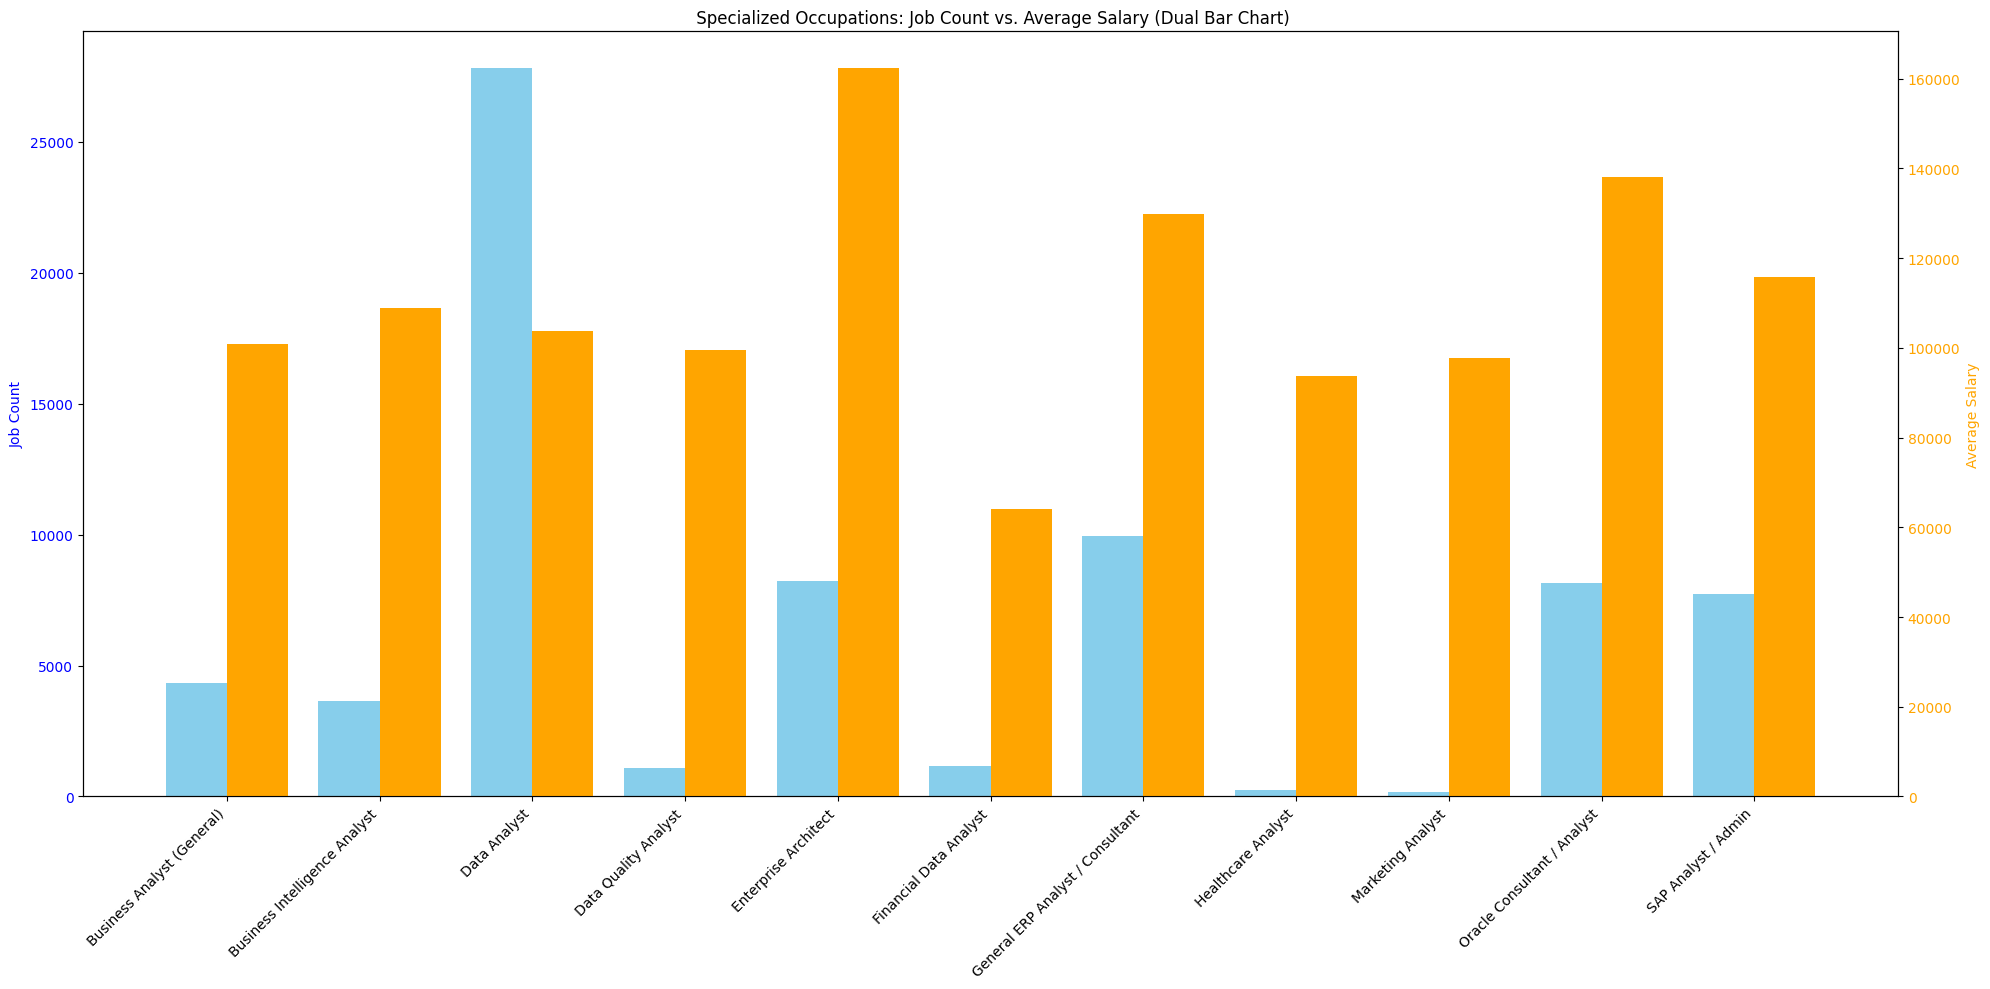

In [14]:
import matplotlib.pyplot as plt
import numpy as np


job_counts = df_selected.pd['LOT_V6_SPECIALIZED_OCCUPATION_NAME'].value_counts()
salary_means = df_selected.pd.groupby("LOT_V6_SPECIALIZED_OCCUPATION_NAME")["SALARY"].mean()


summary_df = pd.DataFrame({
    "Job Count": job_counts,
    "Average Salary": salary_means
}).dropna()



x = np.arange(len(summary_df.index))
width = 0.4  

fig, ax1 = plt.subplots(figsize=(20, 10))


bars1 = ax1.bar(x - width/2, summary_df["Job Count"], width, color='skyblue', label='Job Count')
ax1.set_ylabel("Job Count", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(summary_df.index, rotation=45, ha='right')


ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, summary_df["Average Salary"], width, color='orange', label='Average Salary')
ax2.set_ylabel("Average Salary", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(" Specialized Occupations: Job Count vs. Average Salary (Dual Bar Chart)")
fig.tight_layout()
plt.show()


# Plot 3 Extract the top 10 skills by category

In [ ]:
from collections import Counter
import ast
import pandas as pd

def extract_skills_from_column(spark_df, col_name):
    pandas_series = spark_df.select(col_name).dropna().toPandas()[col_name]
    all_skills = []
    for s in pandas_series:
        try:
            items = ast.literal_eval(s) if isinstance(s, str) and s.startswith("[") else s.split(';')
            all_skills.extend([skill.strip() for skill in items if skill.strip()])
        except:
            continue
    return Counter(all_skills)

# Define the correspondence between columns and skill types
skill_categories = {
    'COMMON_SKILLS_NAME': 'Common',
    'SPECIALIZED_SKILLS_NAME': 'Specialized',
    'SOFTWARE_SKILLS_NAME': 'Software'
}

# DataFrame storing the top 10 of each type
skill_top10_by_type = {}

# Classification statistics skills
for col, skill_type in skill_categories.items():
    counter = extract_skills_from_column(df_selected, col)
    top10 = pd.DataFrame(counter.most_common(10), columns=['Skill', 'Count'])
    top10['Type'] = skill_type
    skill_top10_by_type[skill_type] = top10


common_skills_top10 = skill_top10_by_type['Common']
specialized_skills_top10 = skill_top10_by_type['Specialized']
software_skills_top10 = skill_top10_by_type['Software']

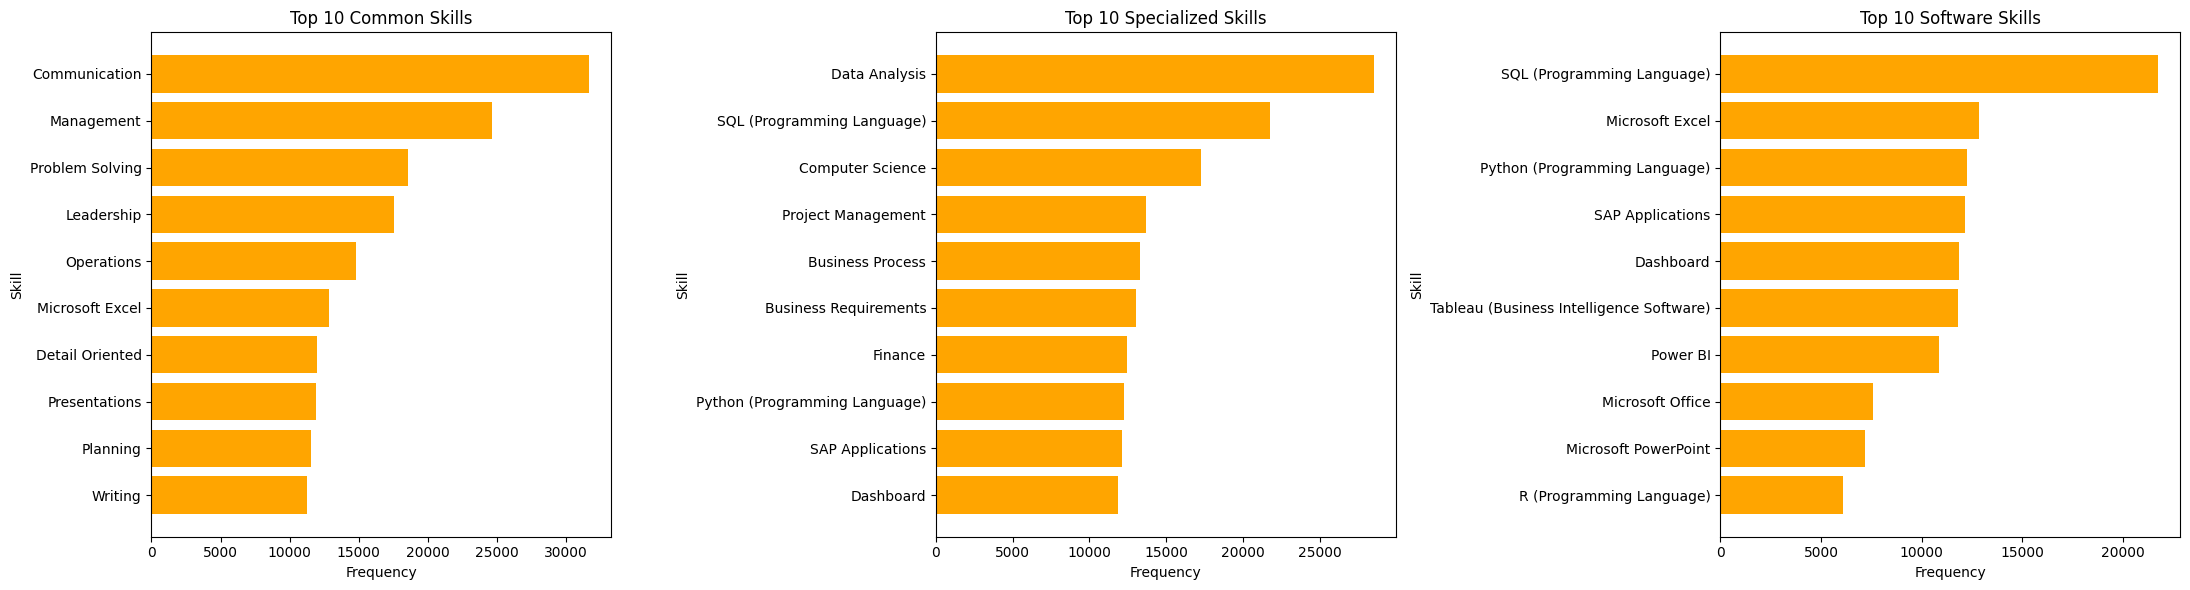

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

for ax, (skill_type, df_top10) in zip(axes, skill_top10_by_type.items()):
    ax.barh(df_top10['Skill'][::-1], df_top10['Count'][::-1], color='orange')
    ax.set_title(f"Top 10 {skill_type} Skills")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Skill")

plt.tight_layout()
plt.show()
